In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('punkt')  # For tokenization
nltk.download('stopwords')  # For stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nives\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nives\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv('C:/Users/nives/OneDrive/Desktop/HybridSA/datasets/IMDB Dataset.csv')
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Text(0.5, 1.0, 'Sentiment distribution')

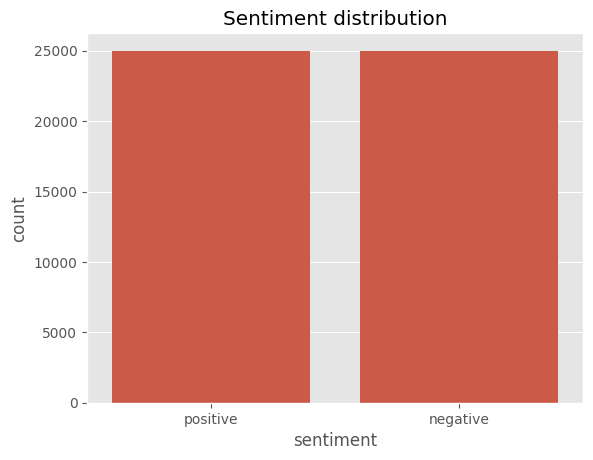

In [5]:
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment distribution")

In [6]:
for i in range(5):
    print("Review: ", [i])
    print(df['review'].iloc[i], "\n")
    print("Sentiment: ", df['sentiment'].iloc[i], "\n\n")

Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

In [7]:
df.sentiment.replace("positive", 1, inplace=True)
df.sentiment.replace("negative", 0, inplace=True)

C:\Users\nives\AppData\Local\Temp\ipykernel_14764\159144519.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.sentiment.replace("positive", 1, inplace=True)
C:\Users\nives\AppData\Local\Temp\ipykernel_14764\159144519.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [8]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [9]:
def preprocess(text):
    text= text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)


In [10]:
df['review'] = df['review'].apply(preprocess)

In [11]:
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  422


In [12]:
df = df.drop_duplicates('review')

In [13]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [14]:
df.review = df['review'].apply(lambda x: stemming(x))

In [15]:
df[df['sentiment'] == 1].head(10)

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
4,petter matteis love time money visually stunni...,1
5,probably alltime favorite movie story selfless...,1
6,sure would like see resurrection dated seahunt...,1
9,like original gut wrenching laughter like movi...,1
14,fantastic movie three prisoners become famous ...,1
16,films simply remade one bad film fails capture...,1
18,remember filmit first film watched cinema pict...,1


In [16]:
df[df['sentiment'] == 0].head(10)

,review,sentiment
3,basically theres family little boy jake thinks...,0
7,show amazing fresh innovative idea 70s first a...,0
8,encouraged positive comments film looking forw...,0
10,phil alien one quirky films humour based aroun...,0
11,saw movie 12 came recall scariest scene big bi...,0
12,im big fan bolls work many enjoyed movie posta...,0
13,cast played shakespeareshakespeare losti appre...,0
15,kind drawn erotic scenes realize one amateuris...,0
17,movie made one top 10 awful movies horrible wa...,0
19,awful film must real stinkers nominated golden...,0


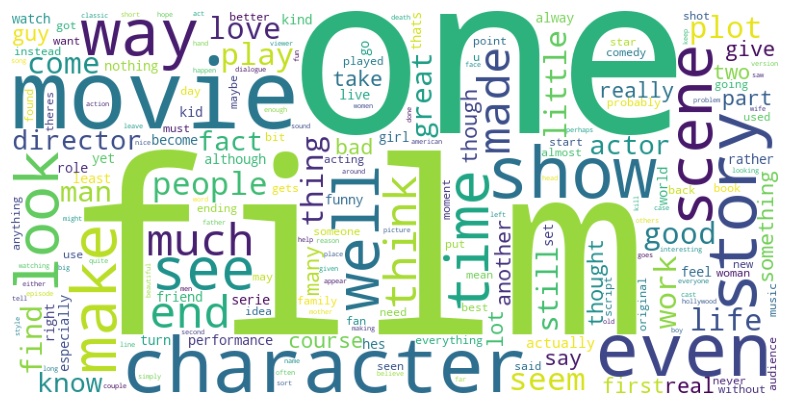

In [17]:
# Combine all reviews into a single string
all_reviews = ' '.join(df['review'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [18]:
df.rename(columns={'review': 'text', 'sentiment': 'labels'}, inplace=True)
df.columns

Index(['text', 'labels'], dtype='object')

In [19]:
import os
folder_path = 'C:/Users/nives/OneDrive/Desktop/HybridSA/cleaned_data'
os.makedirs(folder_path, exist_ok=True)
df.to_csv(os.path.join(folder_path, 'preprocessed_imdb_data.csv'), index=False)